# ICU MORTARLITY PREDICTION

### Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#fe">Feature Engineering</a></li>
<li><a href="#conclusions">Summary</a></li>
</ul>


 <a name = "intro"></a>
>## Introduction
> The challenge is to create a model that uses data from the first 24 hours of intensive care to predict patient survival.  MIT's GOSSIS community initiative, with privacy certification from the Harvard Privacy Lab, has provided a dataset of more than  90000 hospital Intensive Care Unit (ICU) visits from patients, spanning a one-year timeframe. This data is part of a growing global effort and consortium spanning Argentina, Australia, New Zealand, Sri Lanka, Brazil, and more than 200 hospitals in the United States. datset can be found here

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reads both data and data dictionary into a pandas dataframe
df = pd.read_csv('../Datasets/dataset.csv')
df_col_description = pd.read_csv('../Datasets/Data Dictionary.csv')

In [3]:
df.head(3)

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.73,0,Caucasian,M,180.3,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
1,114252,59342,81,77.0,27.42,0,Caucasian,F,160.0,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
2,119783,50777,118,25.0,31.95,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0


In [4]:
df.tail(3)

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
91710,8981,58179,195,48.0,27.236914,0,Caucasian,M,170.2,Accident & Emergency,...,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
91711,33776,120598,66,NaN,23.297481,0,Caucasian,F,154.9,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
91712,1671,53612,104,82.0,22.031250,1,Caucasian,F,160.0,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,Gastrointestinal,Gastrointestinal,NaN,0


In [5]:
#rows and columns
print('number of rows are:', df.shape[0]) 
print('number of columns are:', df.shape[1])

number of rows are: 91713
number of columns are: 85


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   91713 non-null  int64  
 1   patient_id                     91713 non-null  int64  
 2   hospital_id                    91713 non-null  int64  
 3   age                            87485 non-null  float64
 4   bmi                            88284 non-null  float64
 5   elective_surgery               91713 non-null  int64  
 6   ethnicity                      90318 non-null  object 
 7   gender                         91688 non-null  object 
 8   height                         90379 non-null  float64
 9   icu_admit_source               91601 non-null  object 
 10  icu_id                         91713 non-null  int64  
 11  icu_stay_type                  91713 non-null  object 
 12  icu_type                       91713 non-null 

In [7]:
#Column key
df_col_description.head(3)

,Category,Variable Name,Unit of Measure,Data Type,Description,Example
0,identifier,encounter_id,None,integer,Unique identifier associated with a patient un...,None
1,identifier,hospital_id,None,integer,Unique identifier associated with a hospital,None
2,identifier,patient_id,None,integer,Unique identifier associated with a patient,None


<a name = "wrangling"></a>
##  Data Wrangling

In [8]:
print(f'They are {df.duplicated().sum()} duplicates in the dataset') 

They are 0 duplicates in the dataset


In [9]:
#inhibit Truncation of data on both rows and colums
#pd.set_option('display.max_columns', None) 
#pd.set_option('display.max_rows', None) 

In [10]:
df.isnull().sum() #sum of nan by columns

encounter_id                       0
patient_id                         0
hospital_id                        0
age                             4228
bmi                             3429
                               ...  
solid_tumor_with_metastasis      715
apache_3j_bodysystem            1662
apache_2_bodysystem             1662
Unnamed: 83                    91713
hospital_death                     0
Length: 85, dtype: int64

They are columns in the datasets that are not relevant to the analysis and need to be droped. These columns are ``` 'encounter_id', 'patient_id', 'hospital_id','Unnamed: 83',``` and ```'icu_id' ``` and may affect the final model accurracy of the final.

In [11]:
#drops the above column list as it will have no effect on the project
columns=['encounter_id', 'patient_id', 'hospital_id','Unnamed: 83','icu_id']
for i in columns:
    df=df.drop(i, axis=1)

In [13]:
columns=['age','bmi','height','weight','resprate_apache','map_apache','d1_diasbp_noninvasive_max']
for i in columns:
    df[i]=df[i].fillna(round(df[i].mean())) #fill the nan in the above columns with columns mean

In [15]:
#drop nan values in the below subset
df=df.dropna(subset=['ethnicity','gender','icu_admit_source','apache_2_diagnosis',
                     'apache_3j_diagnosis','gcs_eyes_apache','apache_4a_hospital_death_prob',
                    'd1_potassium_min','h1_mbp_noninvasive_min','temp_apache','h1_resprate_max',
                    'd1_glucose_max','d1_spo2_max','h1_spo2_max','h1_diasbp_max','h1_sysbp_noninvasive_max',
                    'h1_heartrate_max','d1_temp_max','d1_temp_min'])

In [16]:
#rows and columns
print(f'After handling missing value they are {df.shape[0]} row and {df.shape[1]} columns left')

After handling missing value they are 61144 row and 80 columns left


<a name = "eda"></a>
## Exploratory Data Analysis

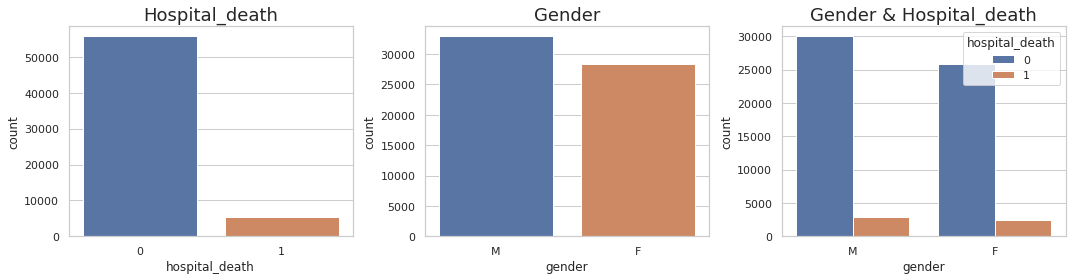

In [17]:
plt.figure(figsize=(15,4))
ax1=plt.subplot(1, 3, 1)
sns.countplot(x='hospital_death', data=df, ax=ax1) #count plot of target feature
plt.title('Hospital_death',fontsize=18)

ax2=plt.subplot(1, 3, 2)
sns.countplot(x='gender', data=df,ax=ax2) #count plot of target feature
plt.title('Gender',fontsize=18)

ax3=plt.subplot(1, 3, 3)
sns.countplot(x='gender', data=df, hue='hospital_death', ax=ax3) #count plot of target feature
plt.title('Gender & Hospital_death',fontsize=18)
plt.tight_layout()
plt.show()

The target feature (hospital_death) is highly imbalance with with a ```91%``` survival rate and ```9%``` non survival in the data set, there are ```41898 male``` and ```35746 female``` in the observation. They are ```32817 female``` and  ```38423 male``` who suvrived while ```3129 female``` and ```3475 male``` did not.

In [18]:
round(df.describe(),2)

,age,bmi,elective_surgery,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,...,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,hospital_death
count,61144.00,61144.00,61144.00,61144.00,61144.00,61144.00,61144.00,61144.00,61144.00,61144.00,...,61144.00,61144.00,61144.00,61144.00,61144.00,61144.00,61144.00,61144.00,61144.00,61144.00
mean,62.53,29.10,0.16,169.57,0.82,83.77,181.50,543.84,0.18,0.03,...,0.06,0.00,0.02,0.23,0.01,0.03,0.01,0.00,0.02,0.09
std,16.32,8.14,0.36,10.75,2.40,24.77,85.56,449.30,0.38,0.17,...,0.19,0.03,0.13,0.42,0.12,0.17,0.09,0.06,0.15,0.28
min,16.00,14.84,0.00,137.20,-0.25,38.60,101.00,101.01,0.00,0.00,...,-1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,53.00,23.69,0.00,162.50,0.03,66.80,113.00,204.01,0.00,0.00,...,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,64.00,27.85,0.00,170.00,0.14,80.70,122.00,409.02,0.00,0.00,...,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,75.00,32.62,0.00,177.80,0.39,96.10,301.00,703.03,0.00,0.00,...,0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,89.00,67.81,1.00,195.59,73.02,186.00,308.00,2201.05,1.00,1.00,...,0.97,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


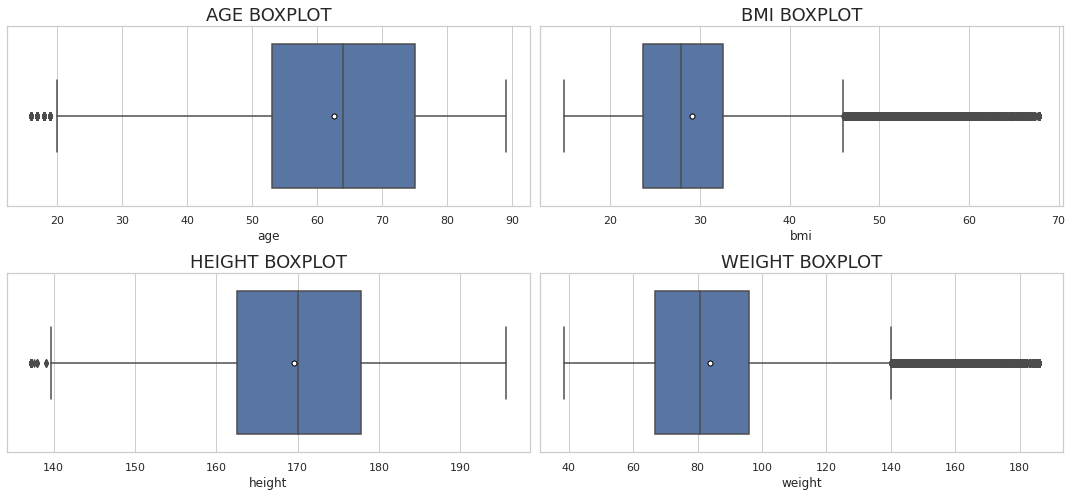

In [19]:
x=['age', 'bmi', 'height', 'weight']
plt.figure(figsize=(15,7))
for i in x:  #boxplot of the above columns in x list
    ax1=plt.subplot(2, 2, x.index(i)+1)
    sns.boxplot(data=df, x=i,ax=ax1, showmeans=True,meanprops={"marker":"o",
                                                               "markerfacecolor":"white",
                                                               "markersize":"5",
                                                                "markeredgecolor":"black"})
    plt.title(f'{i.upper()} BOXPLOT',fontsize=18);
    plt.tight_layout();

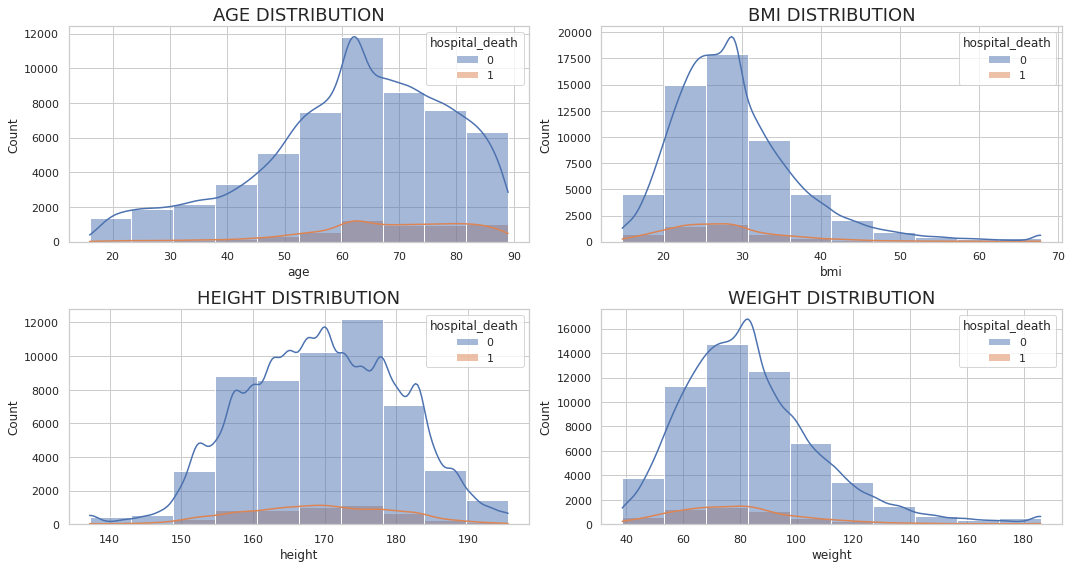

In [20]:
x=['age', 'bmi', 'height', 'weight']
fig=plt.figure(figsize=(15,8))
for i in x:    #Histogram of the columns in x list alonge with kde
    ax1=plt.subplot(2, 2, x.index(i)+1)
    sns.histplot(data=df, x=i, bins=10, kde=True, color = 'navy', hue = 'hospital_death', ax=ax1)
    plt.title(f'{i.upper()} DISTRIBUTION', fontsize=18)
plt.tight_layout();

From the above box plot Age seems to a little left skewed with few outliers, BMI (body max index) and weight right skewed with alot of outliers while heigh is normally distributed with a few outlier. The mean ```age```, ```bmi```, ```height``` and ```weight```  are ```62.48```, ```29.15```, ```169.66``` and ```83.98``` respectively

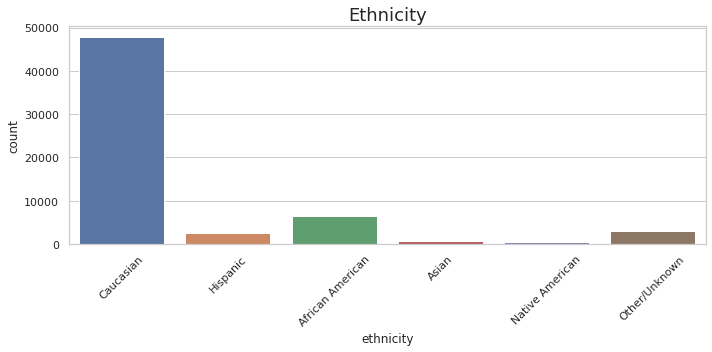

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='ethnicity') # Count plot of Ethnicity column
plt.xticks(rotation=45)
plt.title('Ethnicity', fontsize=18)
plt.tight_layout()

```Caucasian``` > ```African American``` > ```Hispanic``` > ```Asian``` > ```Native American``` 

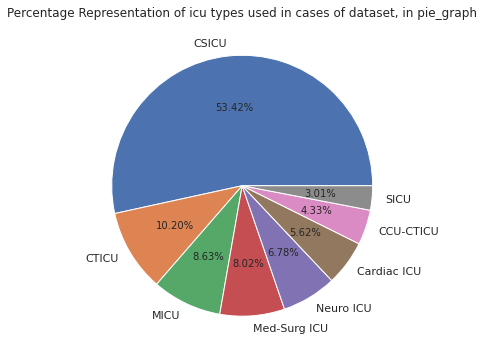

In [22]:
# Pie plot of ICU types
maj_icu = df['icu_type'].value_counts().sort_values(ascending=False)
maj_icu
plt.figure(figsize = (6,6))
plt.title('Percentage Representation of icu types used in cases of dataset, in pie_graph')

plt.pie(maj_icu, labels = {'Med-Surg ICU','MICU','Neuro ICU','CCU-CTICU','SICU','Cardiac ICU','CSICU','CTICU'}, autopct = '%1.2f%%');

From the observation ```Neuro ICU``` provided the most care followed by the ```Cardiac ICU```

In [23]:
apache_3j_death=df.groupby('apache_3j_bodysystem', as_index=False).sum()[['apache_3j_bodysystem','hospital_death']]
apache_3j_death=apache_3j_death.sort_values('hospital_death', ascending=False)

In [24]:
df['apache_2_bodysystem']=df['apache_2_bodysystem'].str.replace('Undefine.*', 'Undefined Diagnoses', regex=True)
apache_2_death=df.groupby('apache_2_bodysystem', as_index=False).sum()[['apache_2_bodysystem','hospital_death']]
apache_2_death=apache_2_death.sort_values('hospital_death', ascending=False)

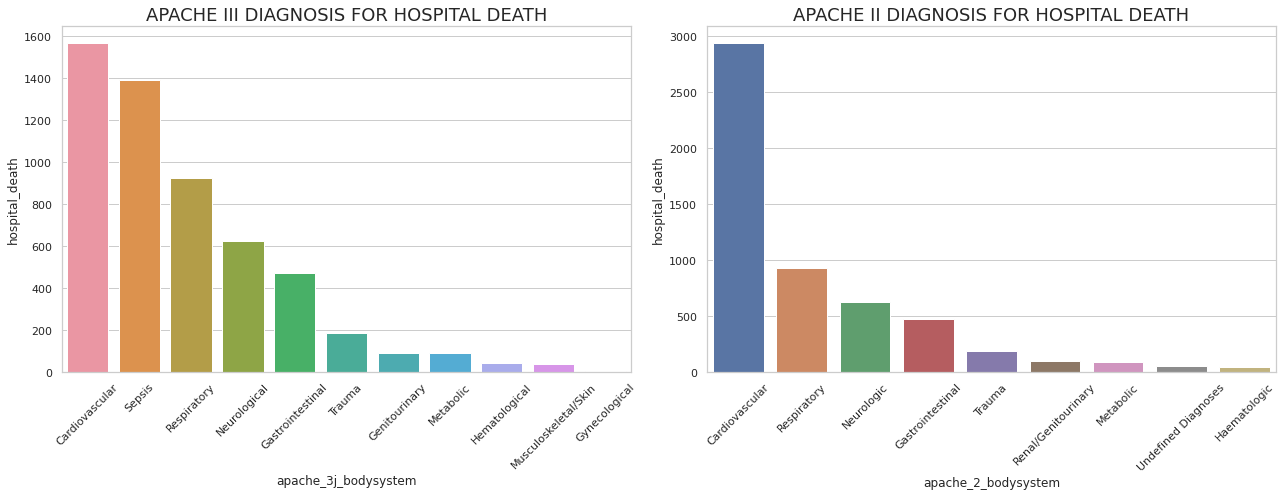

In [25]:
plt.figure(figsize=(18,7))
ax1=plt.subplot(1, 2, 1)
sns.barplot(data=apache_3j_death, x= apache_3j_death['apache_3j_bodysystem'], y=apache_3j_death['hospital_death'], ax=ax1)
plt.xticks(rotation=45)
plt.title('APACHE III DIAGNOSIS FOR HOSPITAL DEATH', fontsize=18);

ax2=plt.subplot(1, 2, 2)
sns.barplot(data=apache_2_death, x= apache_2_death['apache_2_bodysystem'], y=apache_2_death['hospital_death'],ax=ax2)
plt.xticks(rotation=45)
plt.title('APACHE II DIAGNOSIS FOR HOSPITAL DEATH', fontsize=18);
plt.tight_layout()

Admission diagnosis for both APACHE III and  APACHE III ```Cardivascular``` disorder have the highest frequency for those who didnt survive while ```Gynecology``` and ```Heamatologic``` condictions account for least death for both the APACHE III AND APACHE II respectively.

In [26]:
#median is used here as the data is very tailed to the right  and the mean will be greatly affect by outliers
stay=round(df['pre_icu_los_days'].median()*24, 2)
print(f'The average length of stay of the patient between hospital ward admission and unit admission = {stay} hours')

The average length of stay of the patient between hospital ward admission and unit admission = 3.28 hours


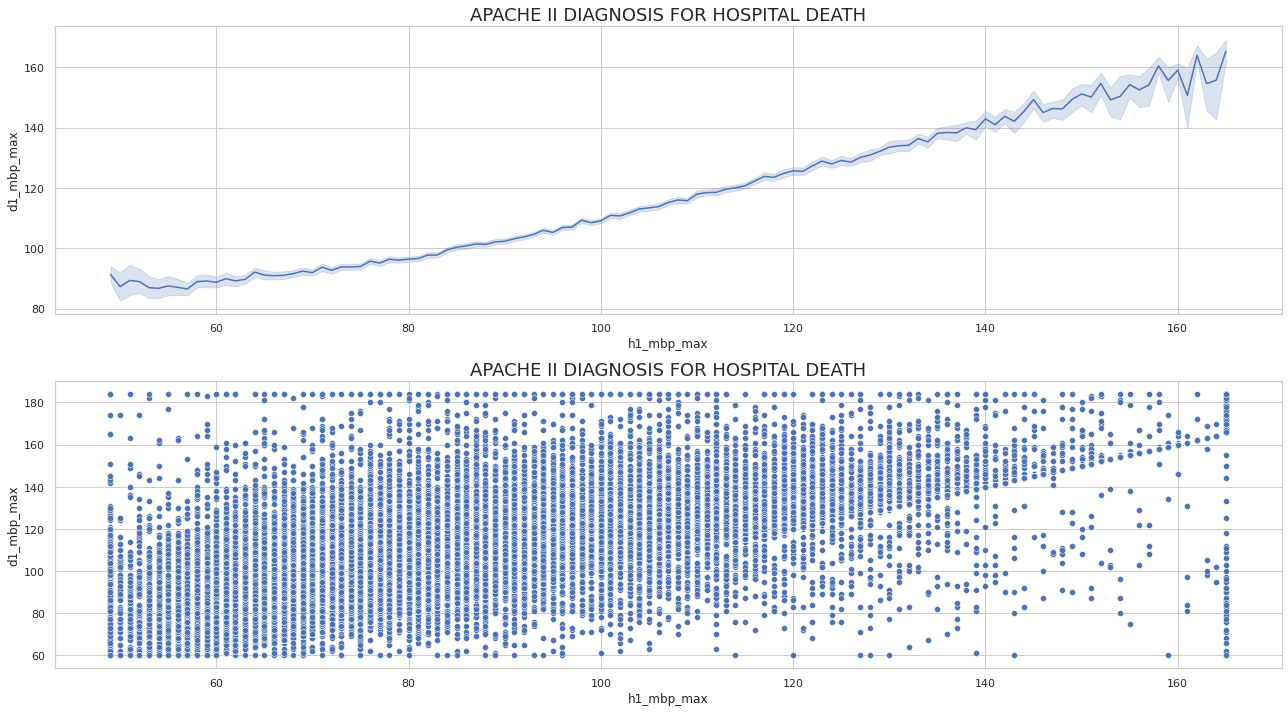

In [27]:
plt.figure(figsize=(18,10))
ax1=plt.subplot(2, 1, 1)
sns.lineplot(data=df, x=df['h1_mbp_max'], y=df['d1_mbp_max'], ax=ax1)
plt.title('APACHE II DIAGNOSIS FOR HOSPITAL DEATH', fontsize=18)
ax2=plt.subplot(2, 1, 2)
sns.scatterplot(data=df, x=df['h1_mbp_max'], y=df['d1_mbp_max'], ax=ax2)
plt.title('APACHE II DIAGNOSIS FOR HOSPITAL DEATH', fontsize=18)
plt.tight_layout();

<a name ="fe"></a>
## Feature Engineering



> **Body Mass Index (BMI)** is a measurement of a person’s weight with respect to his or her height. It is more of an indicator than a direct measurement of a person’s total body fat.
BMI, more often than not, correlates with total body fat. This means that as the BMI score increases, so does a person’s total body fat. The WHO defines an adult who has a BMI between 25 and 29.9 as overweight - an adult who has a BMI of 30 or higher is considered obese - a BMI below 18.5 is considered underweight, and between 18.5 to 24.9 a healthy weight. Folowing grouping bmi_cat column will be created.
![output](../assets/Bmi.png)

In [28]:
df['bmi_cat'] =pd.cut(x=df['bmi'], bins=[0.0, 18.5, 24.9, 29.9, 34.9, 68.8],
                     labels=['underweight', 'normal', 'overweight',
                             'obesity', 'morbid_obesity'])

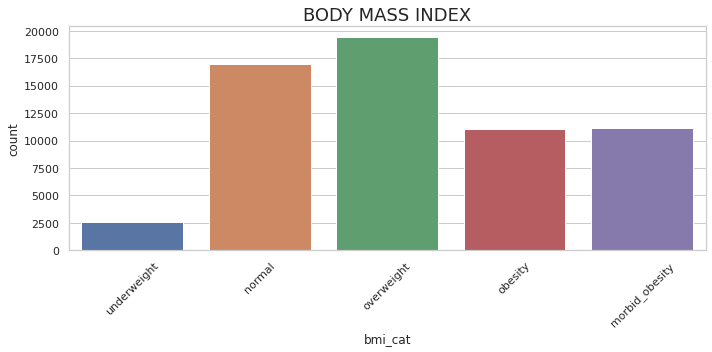

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='bmi_cat') # Count plot of Ethnicity column
plt.xticks(rotation=45)
plt.title('BODY MASS INDEX', fontsize=18)
plt.tight_layout()


> **Glasgow Coma Scale (GCS)**: Healthcare practitioners can monitor (level of conciousness) the motor responsiveness, verbal performance, and eye-opening of the patient in the form of a simple chart. The GCS is the most commonly used tool internationally for this assessment and has been translated into 30 languages. It should not, however, be confused with the Glasgow Outcome Scale (GOS), which evaluates persistent disability after brain damage.
>![output](../assets/gcs.png)

In [30]:
df['Gcs'] = df['gcs_eyes_apache']+df['gcs_motor_apache']+ df['gcs_verbal_apache']
df = df.drop(columns=['gcs_eyes_apache','gcs_motor_apache','gcs_verbal_apache' ])

In [31]:
df['gcs_cat'] =pd.cut(x=df['Gcs'], bins=[2.0, 8.0, 12.0, 14.0, 16],
                     labels=['sever', 'moderate', 'mild',
                             'normal'])

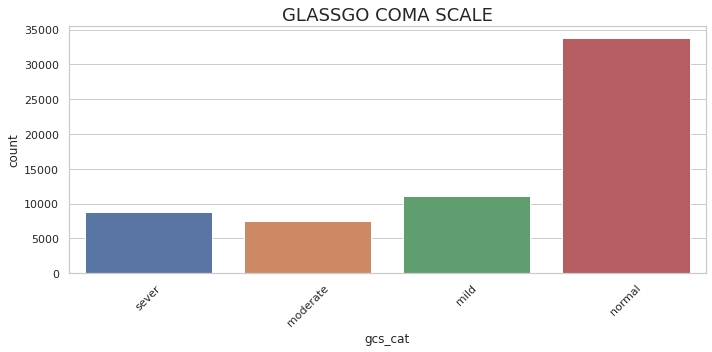

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='gcs_cat') # Count plot of gcs_cat column
plt.xticks(rotation=45)
plt.title('GLASSGO COMA SCALE', fontsize=18)
plt.tight_layout()

>**Age** the age columns is also categorised into ypung adult from 16 to 39. adult from 40 t0 59 and old adult from age above 60
>![output](../assets/age.png)

In [33]:
df['age_cat'] =pd.cut(x=df['age'], bins=[15.0, 39.0, 59.0, 90.0],
                     labels=['young_adult', 'adult', 'old_adult'])

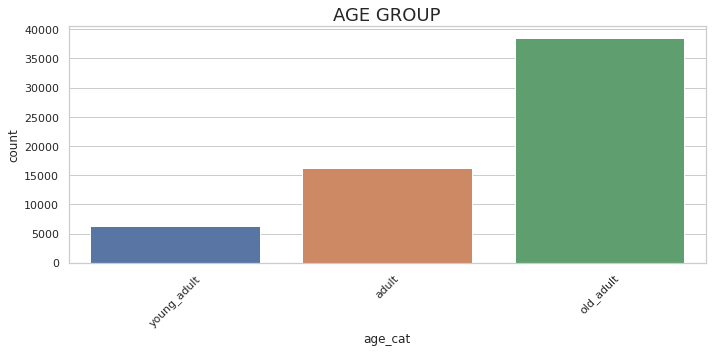

In [34]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='age_cat') # Count plot of age_cat column
plt.xticks(rotation=45)
plt.title('AGE GROUP', fontsize=18)
plt.tight_layout()

**Pluse pressure and Mean arterial pressure**
>Since non-invasive monitors measure blood pressure by volume displacement or flow detection and invasive ones measure pressure impulses rather than flow, it was concluded that the pressure measured by the non-invasive monitor more accurately reflects the propulsive pressure-causing flow when inotropic pressure pulse

In [35]:
df['h1_pluse_P']=df['h1_sysbp_noninvasive_max']-df['h1_diasbp_noninvasive_max']
df=df.drop(df[df['h1_pluse_P']<0].index)

In [36]:
df['h1_pluse_P'] =pd.cut(x=df['h1_pluse_P'], bins=[3.0, 39.0, 60.0, 187.0],
                     labels=['low', 'normal', 'high'])

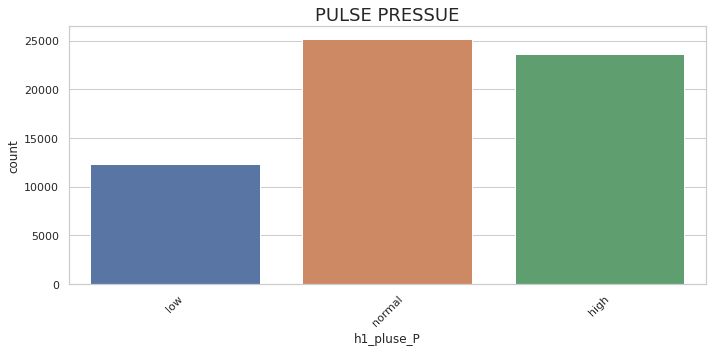

In [37]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='h1_pluse_P') # Count plot of h1_pluse_P column
plt.xticks(rotation=45)
plt.title('PULSE PRESSUE', fontsize=18)
plt.tight_layout()

In [41]:
df['heart_rate_cat'] =pd.cut(x=df['heart_rate_apache'], bins=[0, 59.0, 100.0, 200],
                     labels=['low', 'normal', 'high'])
df['map_cat'] =pd.cut(x=df['map_apache'], bins=[0, 59.0, 100.0, 201],
                     labels=['low', 'normal', 'high'])

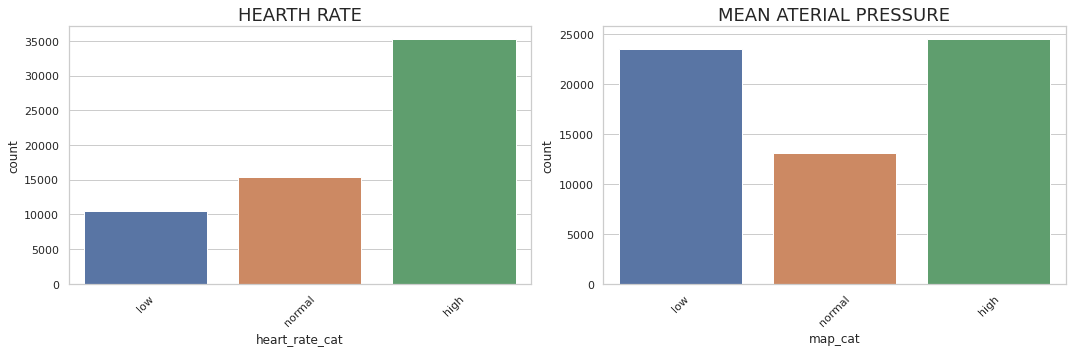

In [42]:
plt.figure(figsize=(15,5))

ax1=plt.subplot(1, 2, 1)
sns.countplot(data=df, x='heart_rate_cat', ax=ax1) # Count plot of heart_rate_apache column
plt.xticks(rotation=45)
plt.title('HEARTH RATE', fontsize=18)
plt.tight_layout()

ax2=plt.subplot(1, 2, 2)
sns.countplot(data=df, x='map_cat', ax=ax2) # Count plot of map_apache column
plt.xticks(rotation=45)
plt.title('MEAN ATERIAL PRESSURE', fontsize=18)
plt.tight_layout()

In [43]:
df.to_csv('../Datasets/clean_dataset',index=False)

<a name="conclusions"></a>
    
## Summary

> - The dataset was  cleaned first by dropping column such ```'encounter_id', 'patient_id'``` which are identification irrelevanto the analysis. NAN values were filled with mean median depending on the distribution of the columns. some columns with a lot of missing data were also drop to prevent the generation of excess artifical data that may affect the project.

> - Both univariate and bivariate anlaysis were done to get to have insight about dataset. such insight include; 1. the Observation capture alsmost equal propotion of male and female. 2.mostof the patient who did not survive the ICU had a had APACHE III and II diagnosis for xardivascular disease while Gyne conditons had the least death of 4 from the observation. 3. The average wait time frrom the hospital ward to the ICU was 3 hours and a they is a linear relationship betweeen 1hour mean blood pressure and 24hour mean blood pressure

> - Some new feature were engineered. enginerrd features include ```bmi_cat map_cat heart_rate_cat h1_pluse_P age_cat```

### One Hot Encoding
> One hot encoding is one method of converting data to prepare it for an algorithm and get a better prediction. With one-hot, we convert each categorical value into a new categorical column and assign a binary value of 1 or 0 to those columns. Each integer value is represented as a binary vector. All the values are zero, and the index is marked with a 1.

In [122]:
cols=list(df.columns[df.dtypes=='object'])#catgorical columns
cat_col=df[cols]

In [123]:
x=pd.get_dummies(cat_col) # convert categorical columns to dummies
df=df.drop(cols, axis=1) # drop original columns
df=df.join(x) #join dummies

In [124]:
df.head(3)

,age,bmi,elective_surgery,pre_icu_los_days,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,...,apache_3j_bodysystem_Trauma,apache_2_bodysystem_Cardiovascular,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses
0,68.0,22.73,0,0.541667,113.0,502.01,0,0.0,3.0,6.0,...,0,1,0,0,0,0,0,0,0,0
1,77.0,27.42,0,0.927778,108.0,203.01,0,0.0,1.0,3.0,...,0,0,0,0,0,0,0,1,0,0
5,67.0,27.56,0,0.000694,301.0,403.01,0,0.0,4.0,6.0,...,0,0,0,0,0,1,0,0,0,0


In [125]:
X = df.drop('hospital_death', axis=1) # saving predictors in X variable
y = df['hospital_death'] #saving target feature in y variable

In [126]:
#split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [127]:
X_train['hospital_death'] = y_train

In [128]:
X_train['hospital_death']=y_train
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = X_train[X_train['hospital_death']==0]
df_minority = X_train[X_train['hospital_death']==1]
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=44575,    # to match majority class
                                 random_state=123) # reproducible results
X_train= pd.concat([df_majority, df_minority_upsampled])

In [129]:
over_sampled_y_train = X_train['hospital_death']
over_sampled_X_train = X_train.drop(columns=['hospital_death'])

In [130]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [131]:
# corr_features = correlation(over_sampled_X_train, 0.90)
# print(f'They are about {len(set(corr_features))} columns say same thing')

In [132]:
# over_sampled_X_train=over_sampled_X_train.drop(corr_features,axis=1)

In [133]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(over_sampled_X_train, over_sampled_y_train) #using mutual infomation gain

In [134]:
mutual_info = pd.Series(mutual_info) #converts to pandas series
mutual_info.index = over_sampled_X_train.columns #set index as column
mutual_info.sort_values(ascending=False).head(11) #display top 5 in desc order

bmi                              0.357152
apache_4a_hospital_death_prob    0.215524
apache_4a_icu_death_prob         0.210703
pre_icu_los_days                 0.130726
apache_3j_diagnosis              0.116549
apache_2_diagnosis               0.089255
gcs_motor_apache                 0.076295
ventilated_apache                0.073963
gcs_verbal_apache                0.073437
d1_sysbp_min                     0.069901
gcs_eyes_apache                  0.068354
dtype: float64

<AxesSubplot:>

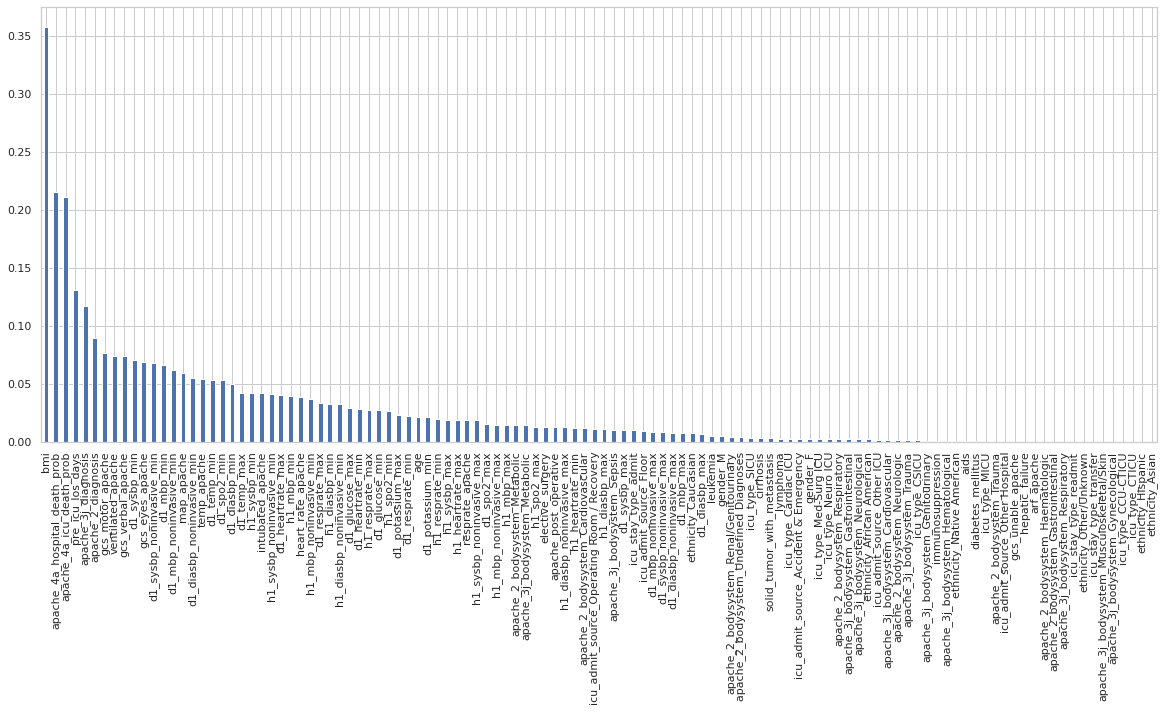

In [135]:
# plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [136]:
X_test.head()

,age,bmi,elective_surgery,pre_icu_los_days,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,...,apache_3j_bodysystem_Trauma,apache_2_bodysystem_Cardiovascular,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses
48875,58.0,39.551780,0,0.109028,117.0,106.01,0,0.0,4.0,6.0,...,0,1,0,0,0,0,0,0,0,0
81378,86.0,19.010712,0,3.350694,304.0,301.03,0,0.0,4.0,6.0,...,0,0,1,0,0,0,0,0,0,0
88337,81.0,26.951074,0,0.120139,301.0,403.01,0,0.0,1.0,1.0,...,0,0,0,0,0,1,0,0,0,0
87284,23.0,23.705317,0,0.004167,122.0,703.03,0,0.0,3.0,6.0,...,0,0,0,0,1,0,0,0,0,0
16564,69.0,38.732976,0,0.076389,303.0,211.09,0,0.0,3.0,6.0,...,0,0,0,0,0,0,0,1,0,0


In [137]:
# New train and test with 11 features
x=mutual_info.index[:11]
X_train=over_sampled_X_train[x]
X_test=X_test[x]
y_train=over_sampled_y_train

In [138]:
X_test[x]

,age,bmi,elective_surgery,pre_icu_los_days,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache
48875,58.0,39.551780,0,0.109028,117.0,106.01,0,0.0,4.0,6.0,0.0
81378,86.0,19.010712,0,3.350694,304.0,301.03,0,0.0,4.0,6.0,0.0
88337,81.0,26.951074,0,0.120139,301.0,403.01,0,0.0,1.0,1.0,0.0
87284,23.0,23.705317,0,0.004167,122.0,703.03,0,0.0,3.0,6.0,0.0
16564,69.0,38.732976,0,0.076389,303.0,211.09,0,0.0,3.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
316,49.0,25.112916,0,0.020139,122.0,703.03,0,0.0,2.0,4.0,0.0
47983,66.0,37.888965,0,0.036111,302.0,109.16,0,0.0,4.0,6.0,0.0
77064,53.0,36.045563,0,0.088889,122.0,703.03,0,0.0,1.0,1.0,0.0
59299,62.0,24.887138,1,0.193056,202.0,1204.01,1,0.0,4.0,6.0,0.0


In [139]:
y_train.value_counts()

0    44575
1    44575
Name: hospital_death, dtype: int64

In [140]:
X_train.head(4)

,age,bmi,elective_surgery,pre_icu_los_days,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache
47110,47.0,18.026035,0,1.300000,117.0,106.01,0,0.0,4.0,6.0,0.0
15957,87.0,27.359332,0,0.440972,102.0,206.01,0,0.0,4.0,6.0,0.0
71069,36.0,26.866720,0,0.164583,123.0,702.01,0,0.0,4.0,6.0,0.0
7410,48.0,35.586806,0,0.047917,109.0,108.01,0,0.0,4.0,6.0,0.0


In [141]:
# for some reason scaling decrease accuracy and performance

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()

In [142]:
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.fit_transform(X_test)

In [143]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [144]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']} # l1 lasso l2 ridge
lr=LogisticRegression()
gscv = RandomizedSearchCV(lr,parameters,scoring='roc_auc',cv=10)
logreg_cv = gscv.fit(X_train,y_train)

In [145]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'solver': 'lbfgs', 'penalty': 'l2', 'C': 1}
accuracy : 0.7715595250282018


In [146]:
y_pred = logreg_cv.predict(X_test) #predict on X test

Confusion Matrix 



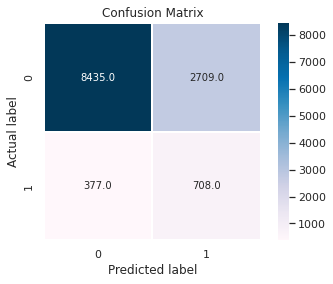

In [147]:
print("Confusion Matrix","\n")
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot=True, fmt=".1f", linewidths=.3, 
        square = True, cmap = 'PuBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix',size = 12)
plt.show()
print("\n")

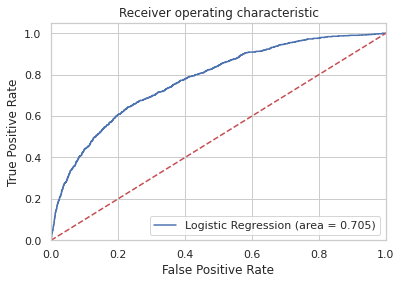

In [148]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg_cv.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg_cv.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.3f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [149]:
from sklearn import tree
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = tree.DecisionTreeClassifier()

In [150]:
rscv = RandomizedSearchCV(tree,parameters,scoring='roc_auc',cv=10,n_iter=10)
tree_cv = rscv.fit(X_train,y_train)
print("accuracy :",tree_cv.best_score_)

accuracy : 0.9357752656283014


In [151]:
y_pred = tree_cv.predict(X_test) #predict on X test

Confusion Matrix 



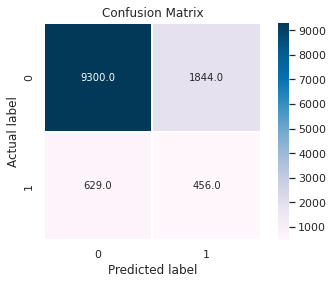

In [152]:
print("Confusion Matrix","\n")
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot=True, fmt=".1f", linewidths=.3, 
        square = True, cmap = 'PuBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix',size = 12)
plt.show()
print("\n")

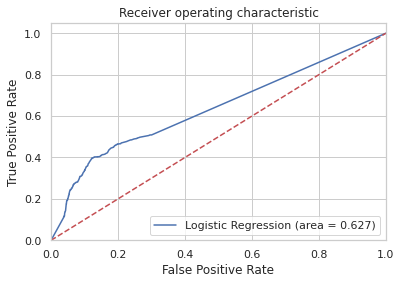

In [153]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, tree_cv.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, tree_cv.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.3f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [154]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=42)

In [155]:
y_pred = rf_model.predict(X_test) #predict on X test

In [156]:
roc_auc_score(y_test, rf_model.predict(X_test))

0.584891913484473

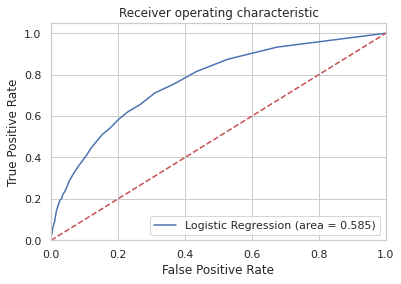

In [157]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, rf_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.3f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [169]:
from xgboost import XGBClassifier

In [170]:
# fit model no training data
xgb_model = XGBClassifier(verbosity = 0)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0)

In [171]:
y_pred = xgb_model.predict(X_test)

In [172]:
roc_auc_score(y_test, xgb_model.predict(X_test))

0.706191093717435

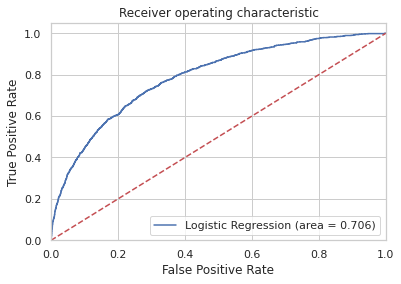

In [173]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, xgb_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, xgb_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.3f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Confusion Matrix 



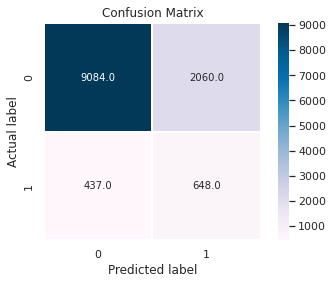

In [174]:
print("Confusion Matrix","\n")
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot=True, fmt=".1f", linewidths=.3, 
        square = True, cmap = 'PuBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix',size = 12)
plt.show()
print("\n")

In [163]:
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier
parameters = {'n_neighbors': [ 2,  4]}

KNN = KNeighborsClassifier()

In [164]:
gscv = RandomizedSearchCV(KNN,parameters,scoring='roc_auc',cv=10)
knn_cv = gscv.fit(X_train,y_train)

In [165]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'n_neighbors': 2}
accuracy : 0.9630118736910086


In [166]:
y_pred = knn_cv.predict(X_test)

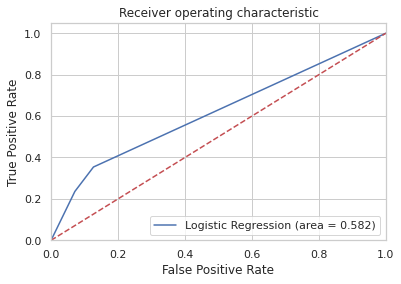

In [167]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, knn_cv.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, knn_cv.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.3f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [168]:
from sklearn.metrics import classification_report
print('classification_report for XGBOOSTER', '\n')
print(classification_report(y_test, y_pred))

classification_report for XGBOOSTER 

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     11144
           1       0.24      0.24      0.24      1085

    accuracy                           0.87     12229
   macro avg       0.59      0.58      0.58     12229
weighted avg       0.87      0.87      0.87     12229

